In [3]:
import urllib.request
import os
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from bytecausal.models.inference.dml import LocalDMLEstimator
from bytecausal.metrics import LocalAUUCScorer, LocalQiniScorer, LocalPercentileGain
from pylift.generate_data import dgp

In [9]:
pd_data = dgp(N=10000, discrete_outcome=True)

Y = 'Outcome'
T = 'Treatment'
pd_data.head()

,0,1,2,Treatment,Outcome
0,0.839266,0.992407,0.855619,1.0,1.0
1,0.878883,0.141808,0.731532,0.0,1.0
2,0.389432,0.577763,0.387384,1.0,1.0
3,0.594237,0.300203,0.398735,0.0,1.0
4,0.409398,0.092747,0.453016,0.0,1.0


In [10]:
import warnings
warnings.filterwarnings("ignore")
dml_estimator = LocalDMLEstimator(y_estimator=LinearRegression(),
                                  t_estimator=LogisticRegression(),
                                  final_estimator=LinearRegression(),
                                  label_col=Y,
                                  treatment_col=T)

dml_model = dml_estimator.fit(pd_data)
prediction = dml_model.predict(pd_data)
print(prediction)

[-0.03424639  0.02140562  0.02030555 ...  0.0056491  -0.01632966
  0.04315244]


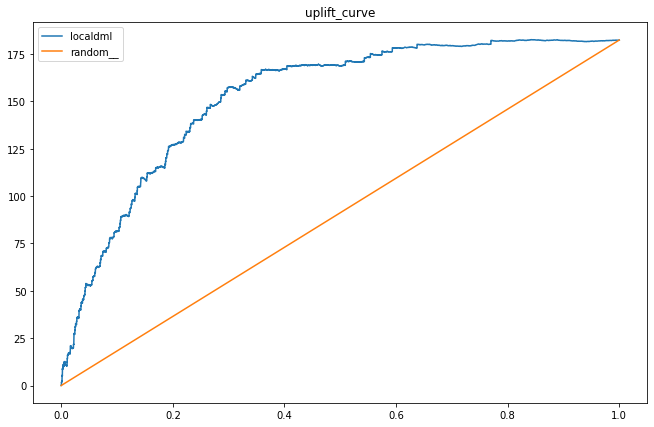

auuc:  {'localdml': 152.45073882094528, 'random__': 91.17629270507571}


In [11]:
prediction_matrix = pd.DataFrame()
prediction_matrix['localdml'] = prediction
prediction_matrix[Y] = pd_data[Y].values
prediction_matrix[T] = pd_data[T].values

scorer = LocalAUUCScorer(prediction_matrix, Y, T)
scorer.plot(kind='line', figsize=(11, 7), title='uplift_curve')
print("auuc: ", scorer.score())

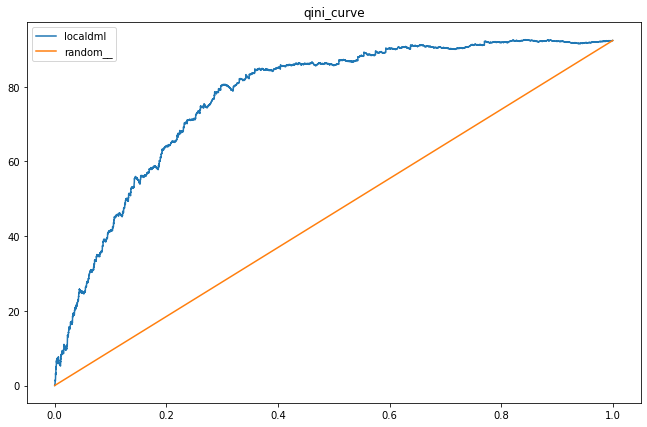

auuc:  {'localdml': 77.16566732809459, 'random__': 46.18079225512116}


In [12]:
qini_scorer = LocalQiniScorer(prediction_matrix, Y, T)
qini_scorer.plot(kind='line', figsize=(11, 7), title='qini_curve')
print("auuc: ", qini_scorer.score())

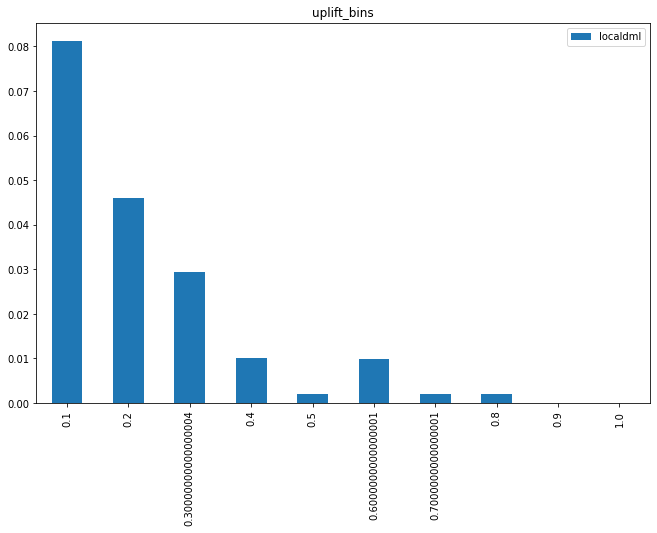

In [15]:
percentile_gain = LocalPercentileGain(prediction_matrix, Y, T, bins=10)
percentile_gain.plot(kind='bar', figsize=(11, 7), title='uplift_bins')